In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import  load_iris

In [192]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [193]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [194]:
df['species']=iris.target
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [195]:
species_map = {0:'Setosa',1:'Versicolor',2:'Virginica'}
species_map


{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [196]:
df['species'] = df['species'].map(species_map)

In [197]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


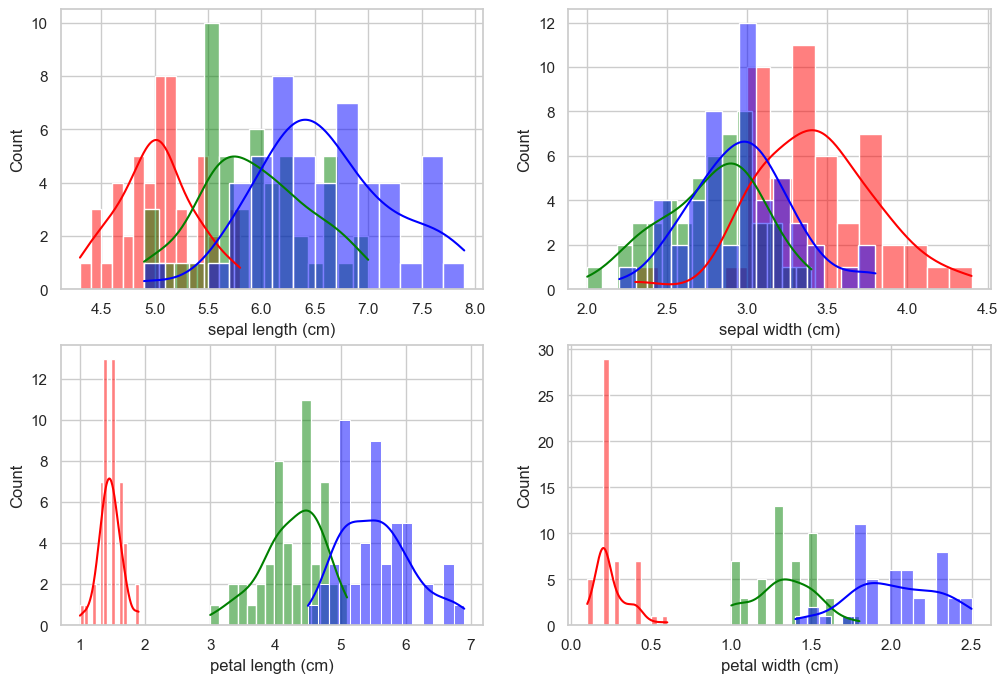

In [198]:
sns.set(style = 'whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
colors = ['red', 'green','blue']
for i, ax in enumerate(axes.flat):
    for species, color in zip(df['species'].unique(),colors):
        subset = df[df['species']==species]
        sns.histplot(subset[features[i]], bins=15, kde=True, color=color, label=species, ax=ax)

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X= iris.data
y = iris.target
classifier = DecisionTreeClassifier(criterion= 'gini',random_state=42) ## change criterion value 'entropy'
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
classifier.fit(X_train,y_train)



DecisionTreeClassifier(random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2,

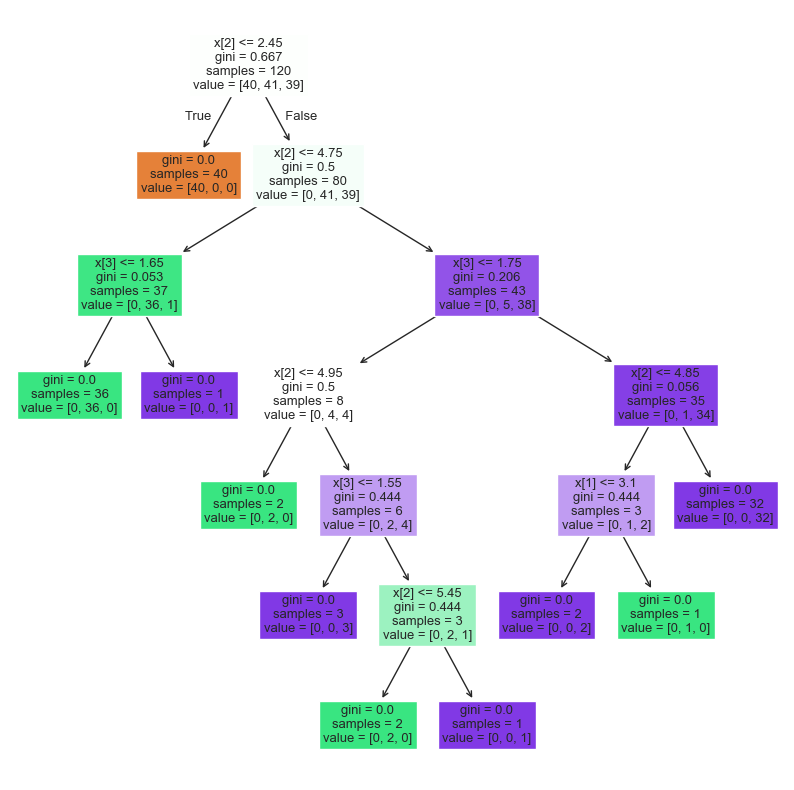

In [200]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(classifier,filled=True)

## Pre and Post Pruning 

In [201]:
from sklearn.metrics import accuracy_score
y_predict= classifier.predict(X_test)
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)

1.0


In [202]:
## Pre and Post Pruning 
iris = load_iris()
X= iris.data
y = iris.target
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [203]:
## Pre-Pruning
pre_pruned_tree = DecisionTreeClassifier(max_depth=6,min_samples_split=3,random_state=42) 
pre_pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42)

In [204]:
pre_pruned_accuracy = pre_pruned_tree.score(X_test,y_test)
pre_pruned_accuracy

1.0

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'

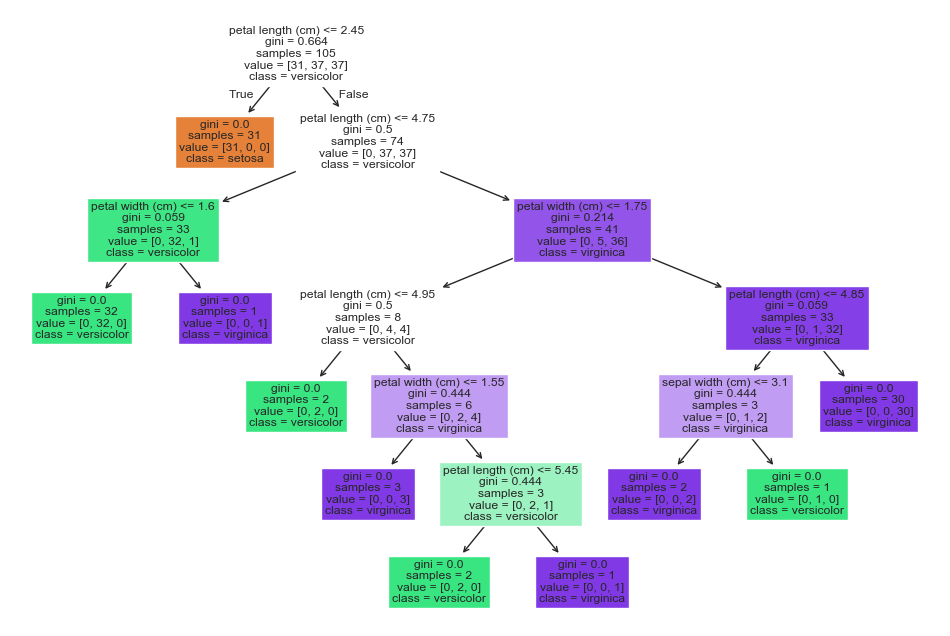

In [205]:
plt.figure(figsize=(12,8))
tree.plot_tree(pre_pruned_tree,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

Pre Pruning with cross valscore

In [206]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12],
          'min_samples_split':[2,3,4,5,6],
          'min_samples_leaf':[1,2]}   ## System will pick the best possible depth,sample split,leaf
classifier = tree.DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(classifier,param_grid=params, cv=10)
grid_search_cv.fit(X_train,y_train)
print("Best Parameter:",grid_search_cv.best_params_)


Best Parameter: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

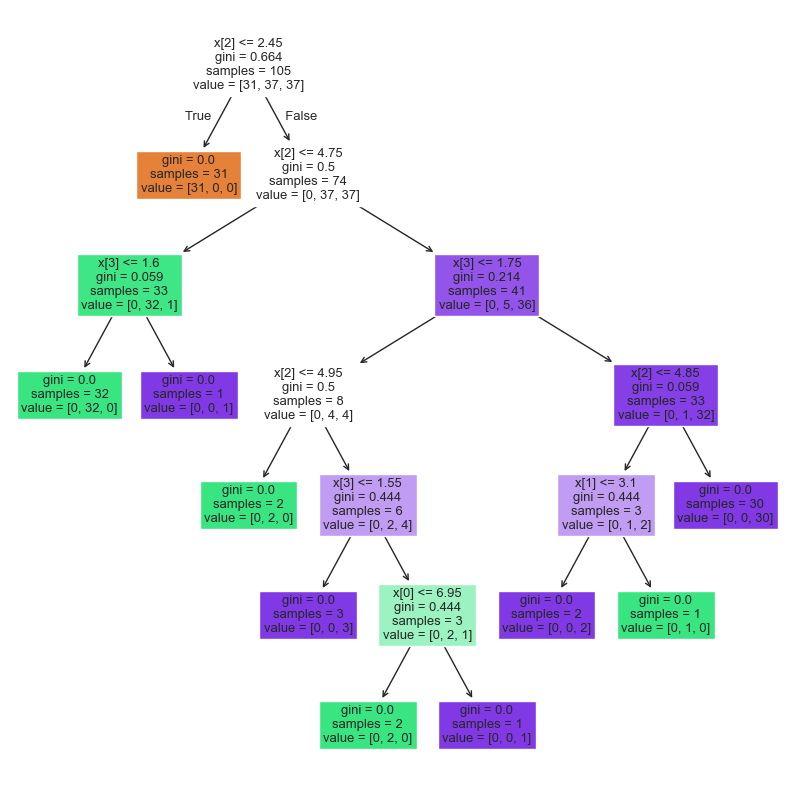

In [207]:
plt.figure(figsize=(10,10))
tree.plot_tree(grid_search_cv.best_estimator_, filled=True)

In [208]:
### Post Prunning 

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [210]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [211]:
# Label Encoding
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [212]:
##Independent and Dependent Features
X = df.drop('species', axis=1)
y = df['species']

In [213]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,8,14,4,1
1,6,9,4,1
2,4,11,3,1
3,3,10,5,1
4,7,15,4,1
...,...,...,...,...
145,24,9,28,19
146,20,4,26,15
147,22,9,28,16
148,19,13,30,19


In [214]:
## Train Test Split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train

,sepal_length,sepal_width,petal_length,petal_width
56,20,12,23,12
104,22,9,34,18
69,13,4,15,7
55,14,7,21,9
132,21,7,32,18
...,...,...,...,...
71,18,7,16,9
106,6,4,21,13
14,15,19,2,1
92,15,5,16,8


In [215]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
Name: species, dtype: int32

In [216]:
## Model Training
full_tree =  DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [217]:
#Pruning Path
path = full_tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas #cost complexity Prunning provide best number of trees fit with provided values
print(ccp_alpha)  

[0.         0.00723514 0.00987654 0.01446208 0.03214286 0.25584243
 0.32966671]


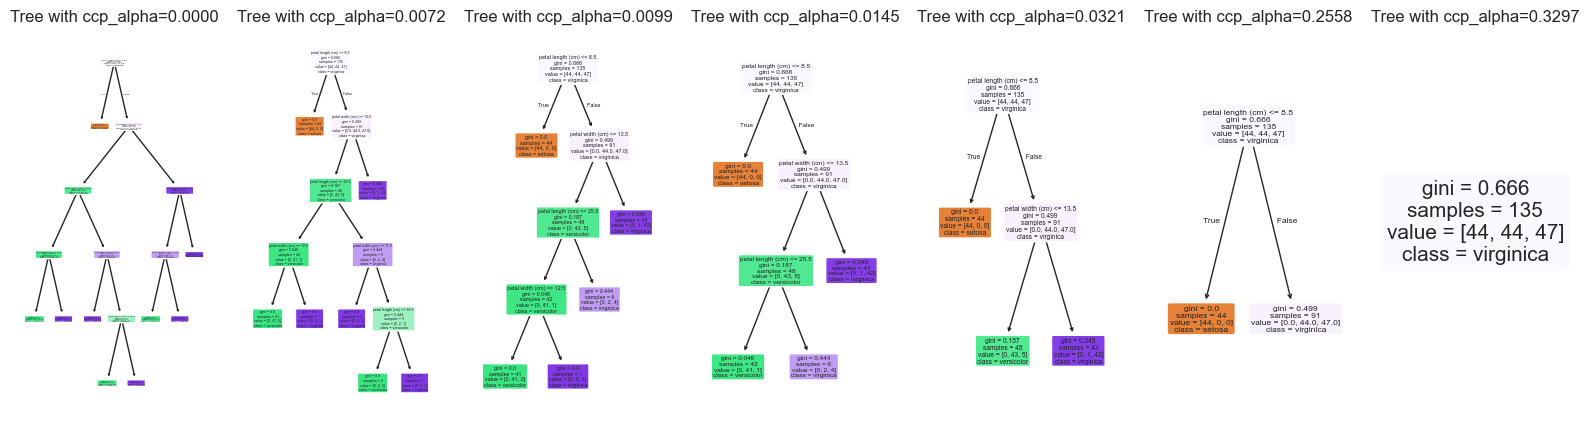

In [218]:
# Train DT with different alpha values
from sklearn.tree import DecisionTreeClassifier, plot_tree
pruned_accuracies = []
selected_alphas = sorted(ccp_alpha)[::max(1, len(ccp_alpha) // 4)]
fig, axes = plt.subplots(nrows=1, ncols=len(selected_alphas), figsize=(20, 5))

for i, alpha in enumerate(selected_alphas): 
    pruned_tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    pruned_tree.fit(X_train, y_train)
    plt.sca(axes[i])
    plot_tree(pruned_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
    plt.title(f"Tree with ccp_alpha={alpha:.4f}")
    accuracy = pruned_tree.score(X_test, y_test)
    pruned_accuracies.append(accuracy)

In [219]:
pruned_accuracies

[1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.2]

In [220]:
best_alpha = ccp_alpha[np.argmax(pruned_accuracies)]
best_alpha

0.0

## Decision Tree with Binary Classification on Numerical Features

In [221]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [222]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data['species'] = iris.target

In [223]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [224]:
X = data['petal length (cm)'].values.flatten()  ## flattern down size the dimension of array
y = data['species'].values

In [225]:
X

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [226]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [227]:
sorted_indices = np.argsort(X) ## Returns the indices that would sort an array.
sorted_indices

array([ 22,  13,  14,  35,  36,  40,  38,  42,   2,  41,  16,  45,  37,
        47,  33,  28,  49,   0,   4,   1,   8,  17,   6,  12,  34,  32,
        31,  39,  27,   7,   3,  48,  15,  21,  19,  10,   9,  30,  11,
        29,  26,  25,  46,  43,  18,   5,  23,  20,  24,  44,  98,  93,
        57,  60,  79,  64,  81,  80,  69,  82,  59,  62,  92,  89,  53,
        71,  88,  67,  99,  61,  96,  94,  95,  97,  74,  75,  90,  65,
        87, 106,  51,  78,  55,  68,  84,  85,  66,  54,  91,  58,  63,
        56,  73,  50,  86,  70, 138,  76, 126,  72,  52, 121, 123, 127,
       146, 119, 113,  77, 141, 114, 133, 142, 149, 110,  83, 101, 147,
       145, 111, 115, 139, 148, 137, 112, 116, 136, 140, 128, 134, 103,
       132, 144, 120, 124, 108, 129, 104, 102, 143, 100, 125, 130, 135,
       109, 107, 131, 105, 117, 122, 118], dtype=int64)

In [228]:
X_sorted = X[sorted_indices]
X_sorted

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3,
       3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7,
       4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2,
       5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1,
       6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

In [229]:
y_sorted = y[sorted_indices]
y_sorted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [230]:
X_sorted

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3,
       3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7,
       4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2,
       5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1,
       6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

In [231]:
X_sorted[:-1]

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3,
       3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7,
       4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2,
       5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1,
       6.1, 6.3, 6.4, 6.6, 6.7, 6.7])

In [232]:
X_sorted[1:]

array([1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3, 3.3,
       3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. , 4. ,
       4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7, 4.7,
       4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 5. ,
       5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2,
       5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1, 6.1,
       6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

In [233]:
split_point = (X_sorted[:-1]+ X_sorted[1:])/2
split_point

array([1.05, 1.15, 1.2 , 1.25, 1.3 , 1.3 , 1.3 , 1.3 , 1.3 , 1.3 , 1.35,
       1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 ,
       1.4 , 1.45, 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
       1.5 , 1.5 , 1.5 , 1.55, 1.6 , 1.6 , 1.6 , 1.6 , 1.6 , 1.6 , 1.65,
       1.7 , 1.7 , 1.7 , 1.8 , 1.9 , 2.45, 3.15, 3.3 , 3.4 , 3.5 , 3.55,
       3.65, 3.75, 3.85, 3.9 , 3.9 , 3.95, 4.  , 4.  , 4.  , 4.  , 4.05,
       4.1 , 4.1 , 4.15, 4.2 , 4.2 , 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.4 ,
       4.4 , 4.45, 4.5 , 4.5 , 4.5 , 4.5 , 4.5 , 4.5 , 4.5 , 4.55, 4.6 ,
       4.6 , 4.65, 4.7 , 4.7 , 4.7 , 4.7 , 4.75, 4.8 , 4.8 , 4.8 , 4.85,
       4.9 , 4.9 , 4.9 , 4.9 , 4.95, 5.  , 5.  , 5.  , 5.05, 5.1 , 5.1 ,
       5.1 , 5.1 , 5.1 , 5.1 , 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 ,
       5.45, 5.5 , 5.5 , 5.55, 5.6 , 5.6 , 5.6 , 5.6 , 5.6 , 5.65, 5.7 ,
       5.7 , 5.75, 5.8 , 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05, 6.1 , 6.1 ,
       6.2 , 6.35, 6.5 , 6.65, 6.7 , 6.8 ])

In [234]:
classes = [0, 1, 2]


In [235]:
def gini_impurity(groups, classes):
    n_instances = sum(len(group) for group in groups)
    gini = 0.0

    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            proportion = (group.count(class_val))/size
            score+=proportion**2
        gini+=(1-score) * (size/n_instances)
    return gini

In [236]:
best_split = None
min_gini = float('inf')

In [237]:
for threshold in split_point:
    left_group = [y_sorted[i] for i in range(len(y_sorted)) if X_sorted[i]<=threshold]
    right_group = [y_sorted[i] for i in range(len(y_sorted)) if X_sorted[i]>threshold]
    gini = gini_impurity([left_group, right_group], classes=[0,1,2])
    # print(gini)
    if gini < min_gini:
        min_gini = gini
        best_split = threshold
    print(f"{threshold:<10.2f} {gini:<15.4f}")
print(f"Threshold = {best_split:.2f} cm, Minimum Gini Impurity = {min_gini:.4f}")

1.05       0.6622         
1.15       0.6577         
1.20       0.6484         
1.25       0.6484         
1.30       0.6139         
1.30       0.6139         
1.30       0.6139         
1.30       0.6139         
1.30       0.6139         
1.30       0.6139         
1.35       0.6139         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.40       0.5397         
1.45       0.5397         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.50       0.4484         
1.55       0.4484         
1

In [238]:
X_binary = (X>best_split).astype(int).reshape(-1,1)
X_binary

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [240]:
X_train, X_test, y_train,y_test = train_test_split(X_binary, y, test_size = 0.2, random_state=42)

In [241]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [242]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names = iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

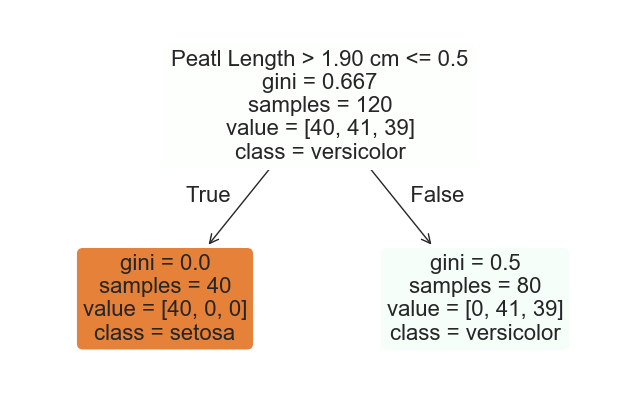

In [243]:
plt.figure(figsize=(8,5))
plot_tree(clf, feature_names = ['Peatl Length > {:.2f} cm'.format(best_split)],
         class_names = iris.target_names, filled=True, rounded=True)
plt.show()